In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/kaggle.json

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:48<00:00, 23.6MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.5MB/s]


In [3]:
#Converting Zipfile to Normal file
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization,Dropout

In [5]:
# generators:-generally divide the large amount of data into the batches
train_dataset=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    batch_size=32,
    image_size=(256,256)
)

validation_dataset=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_dataset=train_dataset.map(process)
validation_dataset=validation_dataset.map(process)

In [22]:
#create CNN model

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
history=model.fit(train_dataset,epochs=10,validation_data=validation_dataset)

Epoch 1/10
625/625 [==============================] - 67s 107ms/step - loss: 0.0699 - accuracy: 0.9765 - val_loss: 0.7537 - val_accuracy: 0.7502
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.0527 - accuracy: 0.9830 - val_loss: 0.9245 - val_accuracy: 0.8006
Epoch 3/10
625/625 [==============================] - 64s 103ms/step - loss: 0.0569 - accuracy: 0.9821 - val_loss: 0.6101 - val_accuracy: 0.8096
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.0426 - accuracy: 0.9868 - val_loss: 0.8906 - val_accuracy: 0.7994
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.0320 - accuracy: 0.9894 - val_loss: 0.7773 - val_accuracy: 0.8366
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.0338 - accuracy: 0.9887 - val_loss: 0.7951 - val_accuracy: 0.8338
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.0321 - accuracy: 0.9902 - val_loss: 0.7869 - val_ac

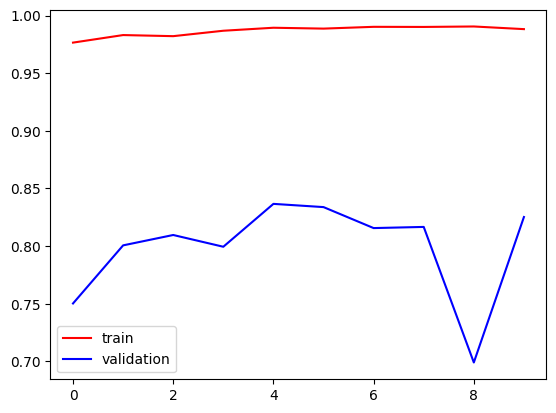

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

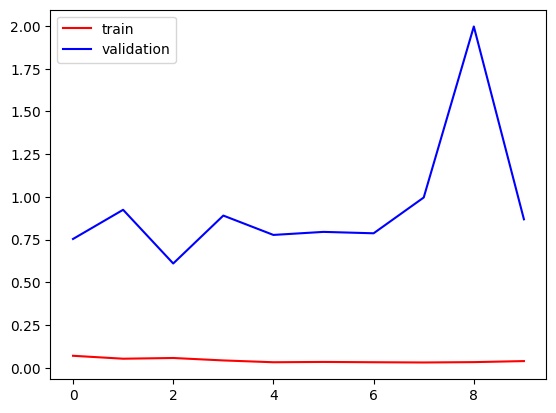

In [29]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [30]:
#Ways to reduce overfitting

# add more data
# data augmentation
# L1/L2 Regularizer
# Dropouts
# BatchNorm
# Reduce Complexity

array([[[18, 96, 55],
        [19, 97, 56],
        [21, 99, 58],
        ...,
        [18, 77, 49],
        [16, 78, 48],
        [14, 79, 47]],

       [[19, 97, 56],
        [19, 97, 56],
        [21, 99, 58],
        ...,
        [14, 76, 46],
        [12, 77, 45],
        [12, 77, 45]],

       [[19, 97, 56],
        [19, 97, 56],
        [20, 99, 58],
        ...,
        [12, 75, 43],
        [10, 76, 41],
        [10, 76, 41]],

       ...,

       [[21, 63, 32],
        [18, 60, 29],
        [ 5, 49, 20],
        ...,
        [ 0, 57, 21],
        [ 0, 57, 21],
        [ 0, 56, 20]],

       [[23, 65, 34],
        [18, 60, 29],
        [ 8, 52, 23],
        ...,
        [ 1, 62, 26],
        [ 1, 62, 26],
        [ 0, 61, 25]],

       [[17, 59, 28],
        [11, 53, 22],
        [ 6, 50, 21],
        ...,
        [ 7, 68, 32],
        [ 7, 68, 32],
        [ 7, 68, 32]]], dtype=uint8)
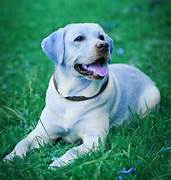

In [39]:
#prediction on unseen data
import cv2
test_img=cv2.imread('/content/dog.jpg')
test_img

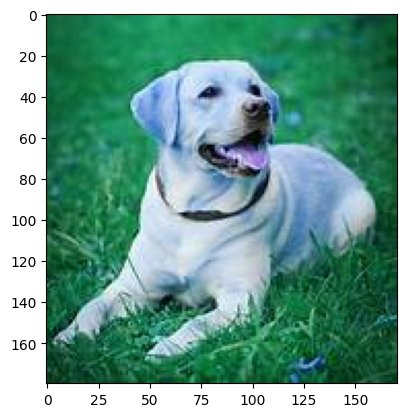

In [40]:
plt.imshow(test_img)

In [41]:
test_img.shape

(180, 171, 3)

In [42]:
test_img=cv2.resize(test_img,(256,256))

array([[[18, 96, 55],
        [18, 96, 55],
        [19, 97, 56],
        ...,
        [16, 78, 48],
        [15, 78, 47],
        [14, 79, 47]],

       [[19, 97, 55],
        [19, 97, 56],
        [19, 97, 56],
        ...,
        [14, 77, 46],
        [13, 77, 46],
        [13, 78, 46]],

       [[19, 97, 56],
        [19, 97, 56],
        [19, 97, 56],
        ...,
        [12, 77, 44],
        [11, 77, 44],
        [11, 77, 44]],

       ...,

       [[22, 64, 33],
        [20, 62, 31],
        [16, 58, 28],
        ...,
        [ 1, 61, 25],
        [ 0, 60, 24],
        [ 0, 60, 24]],

       [[20, 62, 31],
        [17, 59, 28],
        [14, 56, 25],
        ...,
        [ 4, 65, 29],
        [ 3, 64, 28],
        [ 3, 64, 28]],

       [[17, 59, 28],
        [14, 56, 25],
        [10, 52, 22],
        ...,
        [ 7, 68, 32],
        [ 7, 68, 32],
        [ 7, 68, 32]]], dtype=uint8)
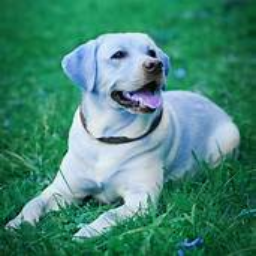

In [43]:
test_img

In [44]:
test_input=test_img.reshape((1,256,256,3))

In [45]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)